In [1]:
trues = []
with open("data/FA-Farsi/fa_dev.conll") as f:
    lines = f.readlines()
    sent = []
    first = True
    for line in lines:
        line = line.replace('\n', '')
        parts = line.split(" ")
        if len(parts)== 4:
            if parts[1] == "_":
                sent.append(parts[3])
                
        else:
            if len(sent)>0:
                trues.append(sent)
            sent = []

preds = []
with open("fa_naive_test.conll") as f:
    lines = f.readlines()
    sent = []
    for line in lines:
        line = line.replace('\n', '')
        if len(line)>0:
            sent.append(line)
        else:
            preds.append(sent)
            sent = []
            
preds_e2e = []
with open("fa.pred.conll") as f:
    lines = f.readlines()
    sent = []
    for line in lines:
        line = line.replace('\n', '')
        if len(line)>0:
            sent.append(line)
        else:
            if len(sent)>0:
                preds_e2e.append(sent)
            sent = []

In [2]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score

In [3]:
f1_score(trues, preds)

0.7639553429027114

In [6]:
import matplotlib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#import SciencePlots

plt.style.use('science')

def flatten(t):
    return [item for sublist in t for item in sublist]
labels = list({'B-CORP': 0, 'I-CORP': 1, 'B-CW': 2, 'I-CW': 3, 'B-GRP': 4, 'I-GRP': 5, 'B-LOC': 6, 'I-LOC': 7, 'B-PER': 8, 'I-PER': 9, 'B-PROD': 10, 'I-PROD': 11, 'O': 12}.keys())


In [39]:
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.2f}".format(cm[i, j])[1:] if cm[i,j]>0.005  else "",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=14)
    plt.xlabel('Predicted label',fontsize=14)

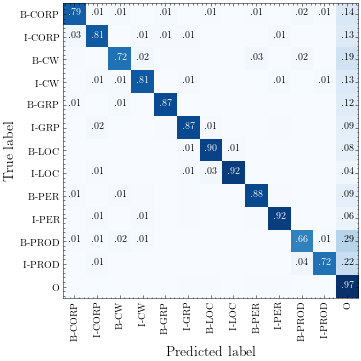

In [40]:
cm = confusion_matrix(flatten(trues), flatten(preds), labels=labels, normalize="true")
matplotlib.rcParams['figure.figsize'] = [5, 5]
plot_confusion_matrix(cm, classes=labels)
plt.savefig('../figures/confusion_matrix_naive.pdf')
plt.show()

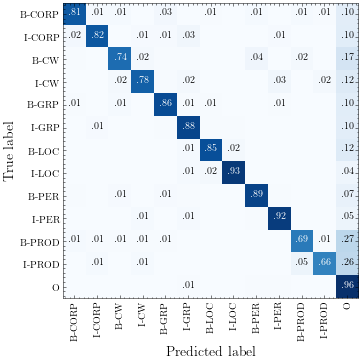

In [41]:
cm = confusion_matrix(flatten(trues), flatten(preds_e2e), labels=labels, normalize="true")
plot_confusion_matrix(cm, classes=labels)
plt.savefig('../figures/confusion_matrix_e2e.pdf')
plt.show()